In [176]:
%pip install pandas sqlalchemy pyodbc seaborn numpy

Note: you may need to restart the kernel to use updated packages.


In [177]:
%time
import json
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import warnings

CPU times: total: 0 ns
Wall time: 0 ns


In [178]:
%time
warnings.filterwarnings('ignore')
# Load configuration from JSON file
with open('C:/Users/Iheb/Desktop/Cours/Projects/config.json', 'r') as config_file:
    config = json.load(config_file)

# Fetching credentials from the configuration
server = config['server']
database = config['database']
username = config['username']
password = config['password']
driver = config['driver']

# Create a database connection string
connection_string = f"mssql+pyodbc://{username}:{password}@{server}/{database}?driver={driver}&TrustServerCertificate=yes"

# Create a SQLAlchemy engine
engine = create_engine(connection_string)

# Example query
query = 'SELECT * FROM [Testing].[dbo].[marketing_data]'

# Execute the query and load data into a pandas DataFrame
df = pd.read_sql(query, engine)

CPU times: total: 0 ns
Wall time: 0 ns


In [179]:
df.info()
# Afficher les premières lignes de la dataframe
print(df.head())
# Voir si'il y a des valeurs nulles
df.isna().sum().sort_values(ascending=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

Income                 24
ID                      0
NumDealsPurchases       0
Complain                0
Response                0
AcceptedCmp2            0
AcceptedCmp1            0
AcceptedCmp5            0
AcceptedCmp4            0
AcceptedCmp3            0
NumWebVisitsMonth       0
NumStorePurchases       0
NumCatalogPurchases     0
NumWebPurchases         0
MntGoldProds            0
Year_Birth              0
MntSweetProducts        0
MntFishProducts         0
MntMeatProducts         0
MntFruits               0
MntWines                0
Recency                 0
Dt_Customer             0
Teenhome                0
Kidhome                 0
Marital_Status          0
Education               0
Country                 0
dtype: int64

In [180]:
#Transformer la colonne "Dt_customer" au format datetime
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
df['Dt_Customer'].info

<bound method Series.info of 0      2013-05-04
1      2014-06-15
2      2012-08-18
3      2013-07-22
4      2013-09-06
          ...    
2235   2014-03-23
2236   2013-08-29
2237   2013-05-20
2238   2014-02-25
2239   2013-12-07
Name: Dt_Customer, Length: 2240, dtype: datetime64[ns]>

In [181]:
df.describe().reset_index().T

,0,1,2,3,4,5,6,7
index,count,mean,min,25%,50%,75%,max,std
ID,2240.0,5592.159821,0.0,2828.25,5458.5,8427.75,11191.0,3246.662198
Year_Birth,2240.0,1968.805804,1893.0,1959.0,1970.0,1977.0,1996.0,11.984069
Income,2216.0,52247.251354,1730.0,35303.0,51381.5,68522.0,666666.0,25173.076661
Kidhome,2240.0,0.444196,0.0,0.0,0.0,1.0,2.0,0.538398
Teenhome,2240.0,0.50625,0.0,0.0,0.0,1.0,2.0,0.544538
Dt_Customer,2240,2013-07-10 10:01:42.857142784,2012-07-30 00:00:00,2013-01-16 00:00:00,2013-07-08 12:00:00,2013-12-30 06:00:00,2014-06-29 00:00:00,NaN
Recency,2240.0,49.109375,0.0,24.0,49.0,74.0,99.0,28.962453
MntWines,2240.0,303.935714,0.0,23.75,173.5,504.25,1493.0,336.597393
MntFruits,2240.0,26.302232,0.0,1.0,8.0,33.0,199.0,39.773434


In [182]:
# Remplacer les espaces dans les noms des colonnes
df.columns = df.columns.str.replace(' ', '')

# Assurer que la colonne 'Income' est de type string avant de remplacer le $ et les espaces dans toutes les lignes
df['Income'] = df['Income'].astype(str).str.replace('$', '', regex=False)

# Remplacer les virgules et convertir en float dans la colonne 'Income'
df['Income'] = df['Income'].str.replace(',', '', regex=False).astype(float)

df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,0,1985,Graduation,Married,70951.0,0,0,2013-05-04,66,239,...,9,1,False,False,False,False,False,False,False,SA
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,7,5,False,False,False,False,True,True,False,CA
2,9,1975,Master,Single,46098.0,1,1,2012-08-18,86,57,...,2,8,False,False,False,False,False,False,False,CA
3,13,1947,PhD,Widow,25358.0,0,1,2013-07-22,57,19,...,3,6,False,False,False,False,False,False,False,SA
4,17,1971,PhD,Married,60491.0,0,1,2013-09-06,81,637,...,7,5,False,False,False,False,False,False,False,SP


In [183]:
#Investigation des valeurs nulles
df.isna().sum().sort_values(ascending=False)

Income                 24
ID                      0
NumDealsPurchases       0
Complain                0
Response                0
AcceptedCmp2            0
AcceptedCmp1            0
AcceptedCmp5            0
AcceptedCmp4            0
AcceptedCmp3            0
NumWebVisitsMonth       0
NumStorePurchases       0
NumCatalogPurchases     0
NumWebPurchases         0
MntGoldProds            0
Year_Birth              0
MntSweetProducts        0
MntFishProducts         0
MntMeatProducts         0
MntFruits               0
MntWines                0
Recency                 0
Dt_Customer             0
Teenhome                0
Kidhome                 0
Marital_Status          0
Education               0
Country                 0
dtype: int64

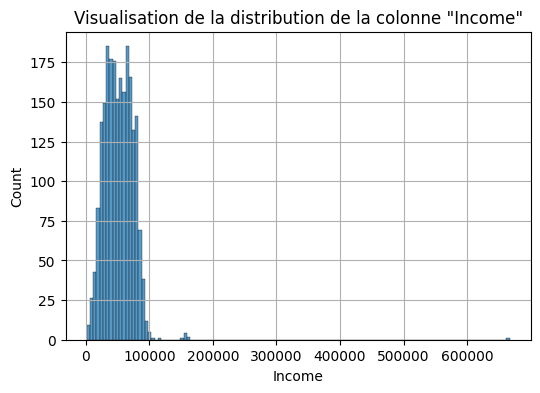

In [184]:
x=df['Income']
plt.figure(figsize =(6,4))
sns.histplot(x, kde=False)
plt.title('Visualisation de la distribution de la colonne "Income"')
plt.xlabel('Income')
plt.ylabel  ('Count')
plt.grid()

<Axes: >

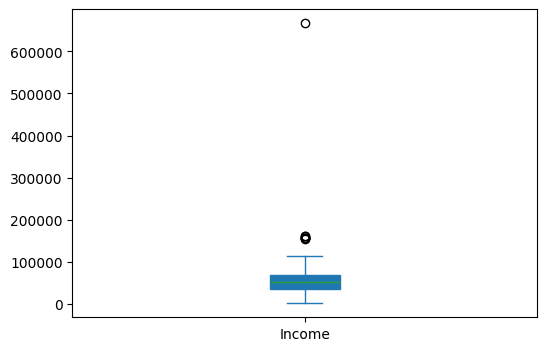

In [185]:
df['Income'].plot(kind='box', figsize=(6,4) ,patch_artist=True)

In [186]:
df['Income']=df['Income'].fillna(df['Income'].median)

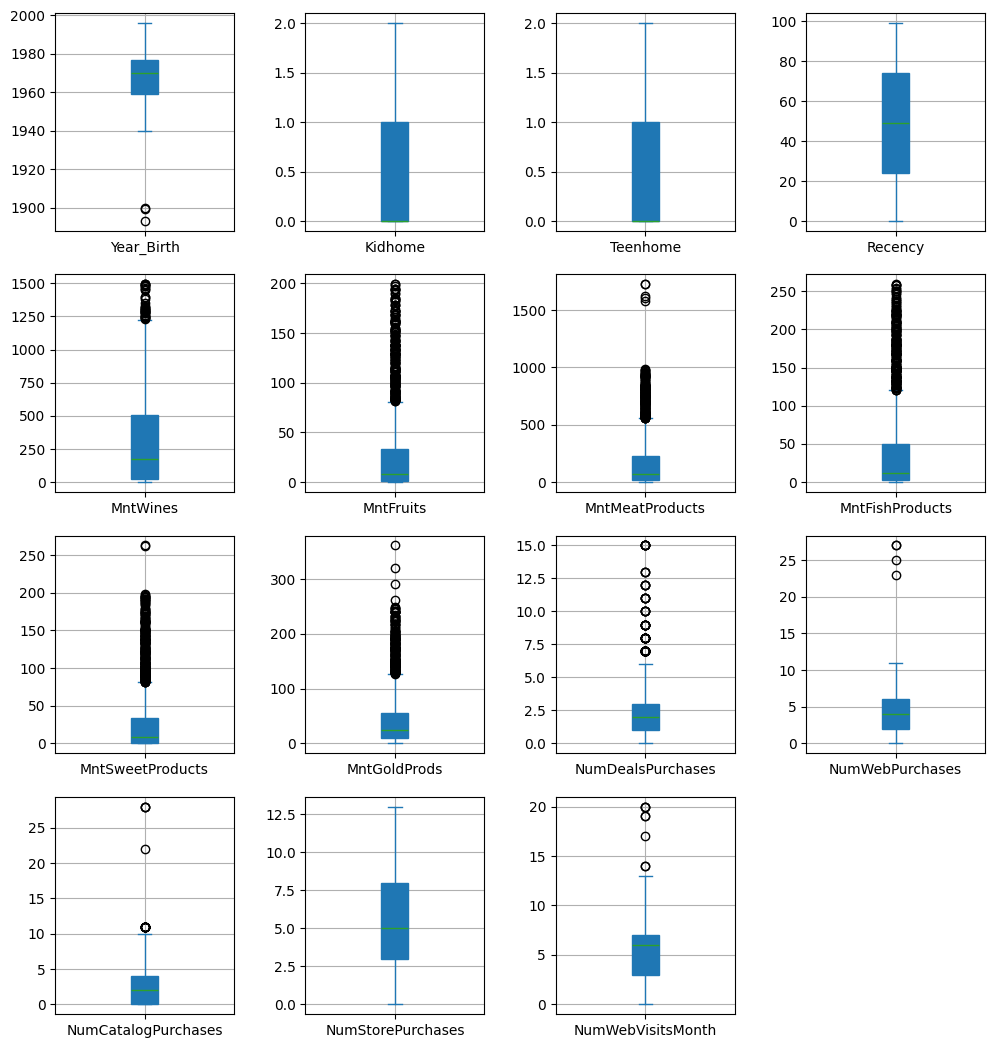

In [187]:
df_to_plot=df.drop(columns=['ID', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'Complain']).select_dtypes(include=np.number)

df_to_plot.plot(kind='box',subplots=True, figsize=(12,13), layout=(4,4), patch_artist=True, grid=True)
plt.subplots_adjust(wspace=0.4)

<Axes: >

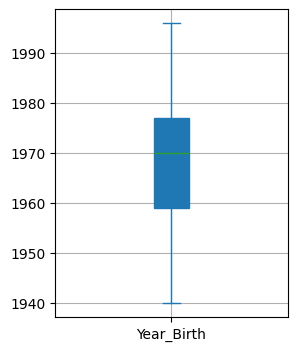

In [188]:
#Suppression les dates de naissances <1900 étant donné que potentiellement ce sont des erreurs de saisie et visualisation du filtrage
df=df[df['Year_Birth']> 1900].reset_index(drop=True)
plt.figure(figsize=(3,4))
df['Year_Birth'].plot(kind='box', grid=True, patch_artist=True)

In [205]:
# Dependents
df['Enfants'] = df['Kidhome'] + df['Teenhome']

# Année de conversion en client
df['Year_Customer'] = pd.DatetimeIndex(df['Dt_Customer']).year

# Montant dépensé 
Mnt_cols= [col for col in df.columns if "Mnt" in col]
df['TotalMnt']= df[Mnt_cols].sum(axis=1)

# Total Achats
purchases_cols = [col for col in df.columns if 'Purchases' in col]
df['TotalPurchases'] = df[purchases_cols].sum(axis=1)

# Total compagnes acceptées par client
campaigns_cols = [col for col in df.columns if 'Cmp' in col] 
df['TotalCampaignsAcc'] = df[campaigns_cols].sum(axis=1)

# Voir les nouveaux attributs, par ID
df[['ID', 'Enfants', 'Year_Customer', 'TotalMnt', 'TotalPurchases', 'TotalCampaignsAcc']].head()

,ID,Enfants,Year_Customer,TotalMnt,TotalPurchases,TotalCampaignsAcc
0,0,0,2013,2396,34,0
1,1,0,2014,1154,36,1
2,9,2,2012,240,22,0
3,13,1,2013,64,12,0
4,17,1,2013,2056,56,0


CPU times: total: 0 ns
Wall time: 0 ns


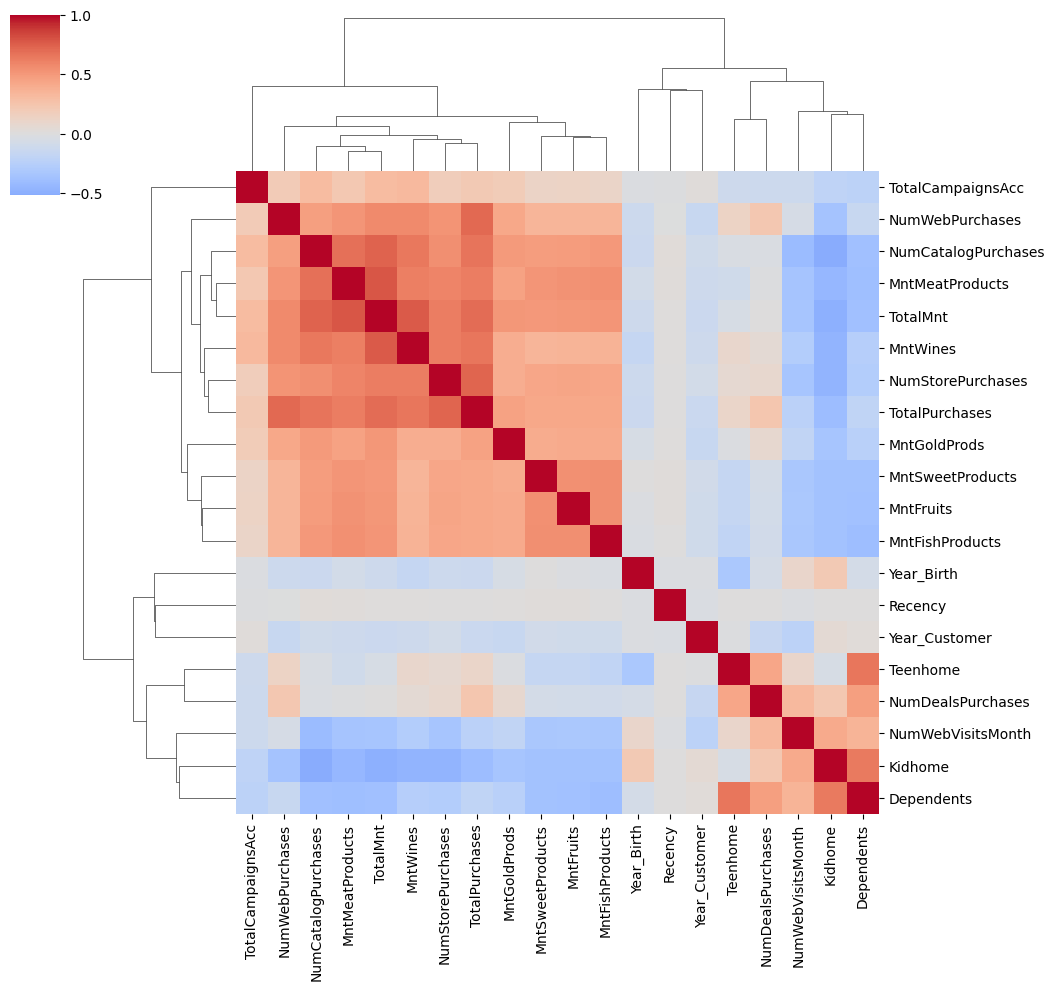

In [190]:
# calcul de la matrice de corrélation
## en utilisant le test de corrélation non paramétrique (Kendall), car certaines caractéristiques sont binaires
corrs = df.drop(columns='ID').select_dtypes(include=np.number).corr(method = 'kendall')

# Heatmap des corrélations
sns.clustermap(corrs, cbar_pos=(-0.05, 0.8, 0.05, 0.18), cmap='coolwarm', center=0)
%time

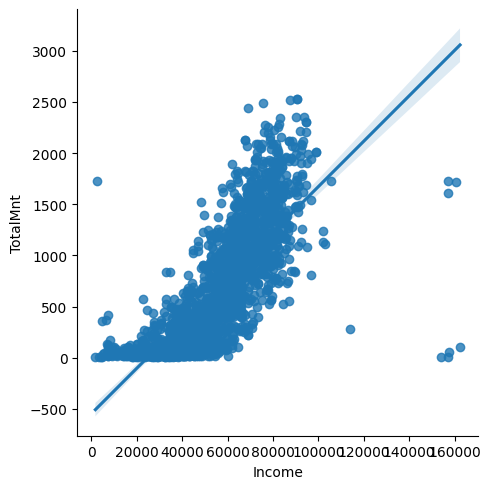

In [204]:
#Illustration montrant l'effet des gros salaires sur les Montants dépensés
df['Income'] = pd.to_numeric(df['Income'], errors='coerce')
sns.lmplot(x='Income', y='TotalMnt', data=df[df['Income']<200000])
#Nb: J'ai limité les salaires à > 200000 pour enlever les outliers

<Axes: xlabel='Enfants', ylabel='TotalMnt'>

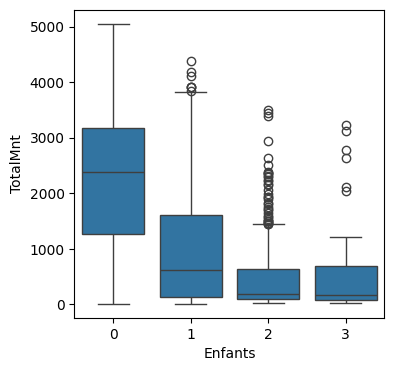

In [206]:
 #illustration qui démontre l'effet negatif d'avoir les enfants sur les dépenses:
plt.figure(figsize=(4,4))
sns.boxplot(x='Enfants', y='TotalMnt', data=df)